In [1]:
from model import *
from dataloader import *
from torch.cuda.amp import autocast as autocast

In [2]:
test_data_loader = get_CHASEDB1_Dataloader(folder='./CHASEDB1/', train=False)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
save_path = './checkpoint/CHASEDB1.pth'
model_state = torch.load(save_path)
model = UNet(in_channels=3, out_channels=1)
model.load_state_dict(model_state)
model.to(device,dtype=torch.float32)
model.eval()

UNet(
  (downs): ModuleList(
    (0): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): DoubleConv(
      (c

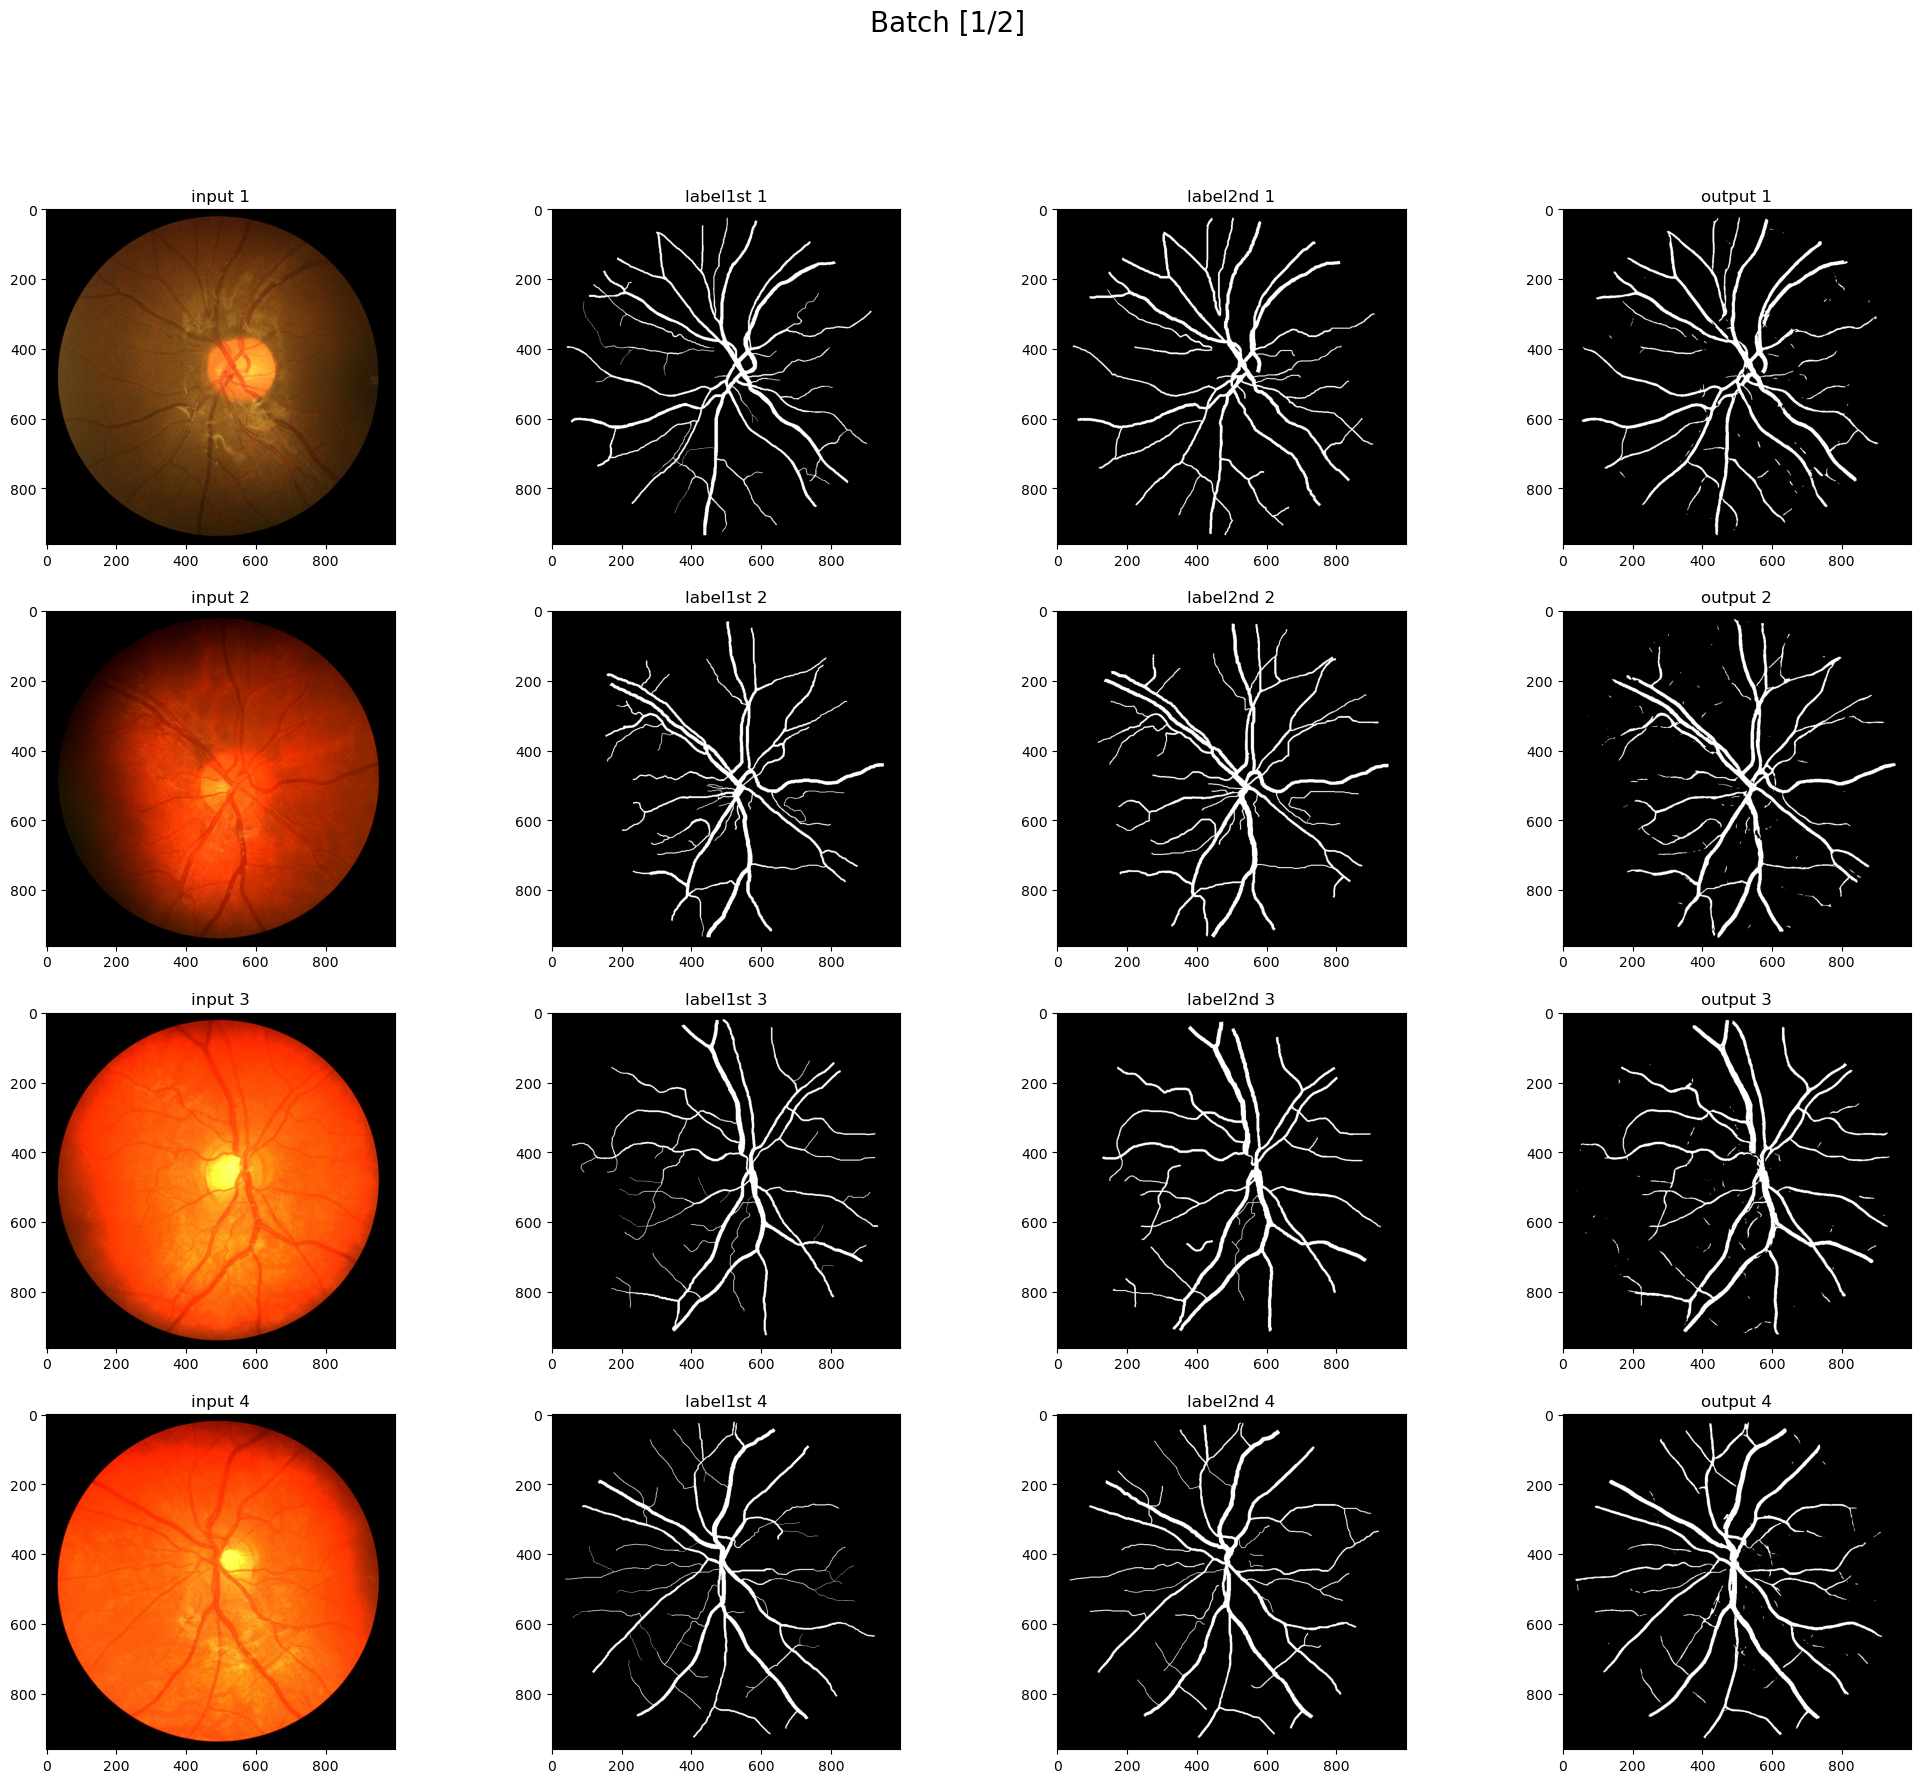

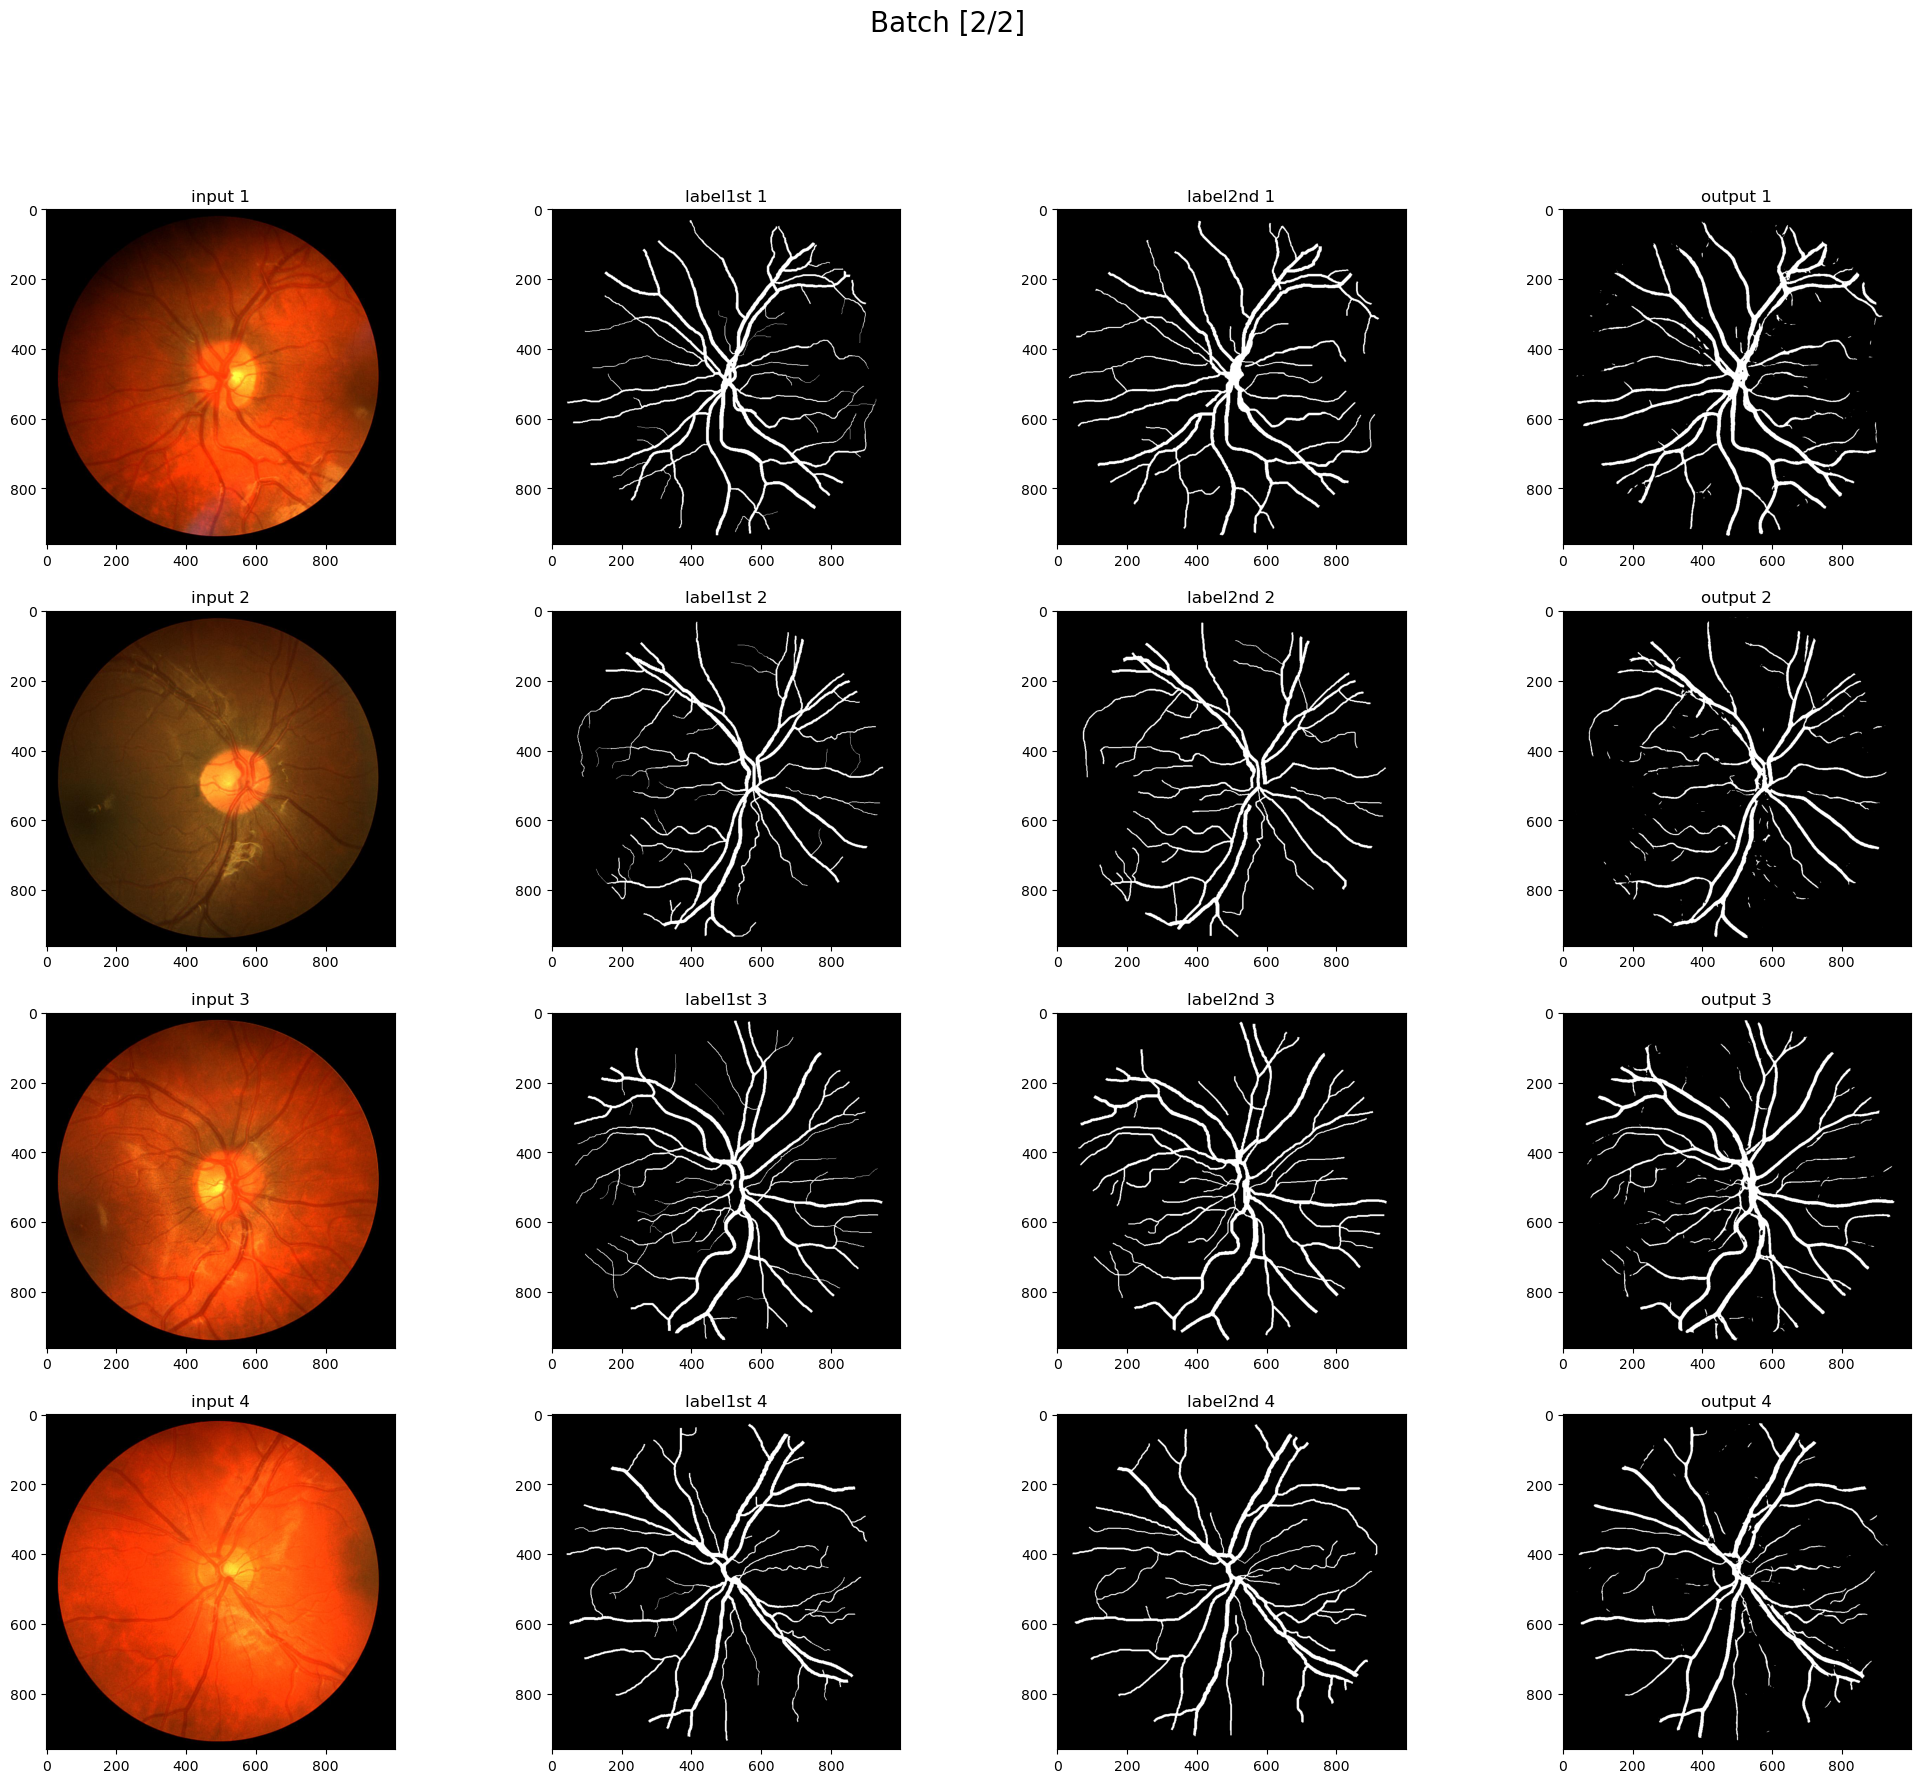

In [5]:
with autocast():
    for index, (input, label1st, label2nd) in enumerate(test_data_loader):
        input = input.to(device)
        output = model(input)
        show_CHASEDB1_result(input, label1st, label2nd, output, title=f'Batch [{index+1}/{len(test_data_loader)}]')